<a href="https://colab.research.google.com/github/longjuice234/dsl-2025/blob/main/1007117_HW03_VerilogGitHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [ ]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Homework

Copy this ipynb to your Github and link to Google Colab for Verilog HDL simulation.

Submit the copy of ipynb with complete solution to the DSL Edimension: Homework Submission.

# Q1-Decade Counter

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the decade_counter as shown below using if-else statements.
3. Submit this file to DSL edimension for assessment;
4. The specification of the decade_counter are:
  - When "rst" is high, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is low, the circuit increments on every positive edge of the clk.
  - The highest count that can be reached is 4'b1001, after which the count will restart from 4'b0000 again.
  - Only when the count is 4'b1001, the output ten is set to ‘1’ else the output ten will always be set to ‘0’.

5. Write a Verilog test stimulus module for the decade_counter and verify its proper operation as follows:
  - Create a clock (Period: 20 unit time);
  - Test for reset active;
  - Then test for the counting for 1 complete count cycles ie: counting from 4'b0000 to 4'b1001;
  - Use Weveform Viewer for viewing the inputs and outputs;
  - Here is Verilog code template.

In [ ]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter(
    input clk,
    input rst,
    output reg [3:0] count,
    output ten
);
    assign ten = (count == 4'b1001);

    always @(posedge clk or posedge rst) begin
        if (rst) begin
            count <= 4'b0000;
        end else if (count >= 4'b1001) begin // Restart count
            count <= 4'b0000;
        end else
            count <= count + 1;
    end

endmodule
////

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter_tb();
    reg clk;
    reg rst;
    wire [3:0]count;
    wire ten;

    decade_counter decade_counter_u0(
        .clk(clk),
        .rst(rst),
        .count(count),
        .ten(ten)
    );

    initial rst=1;
    initial clk=0;
    always begin
        #10 clk=~clk;
    end

    initial
        begin
        $dumpfile("decade.vcd");
        $dumpvars(0,decade_counter_tb);

        #30 rst=0;
        #250 $finish;
    end

    initial
        $monitor($time, " clk=%b rst=%b count=%b ten=%b", clk, rst, count, ten);

endmodule


VCD info: dumpfile decade.vcd opened for output.
                   0 clk=0 rst=1 count=0000 ten=0
                  10 clk=1 rst=1 count=0000 ten=0
                  20 clk=0 rst=1 count=0000 ten=0
                  30 clk=1 rst=0 count=0001 ten=0
                  40 clk=0 rst=0 count=0001 ten=0
                  50 clk=1 rst=0 count=0010 ten=0
                  60 clk=0 rst=0 count=0010 ten=0
                  70 clk=1 rst=0 count=0011 ten=0
                  80 clk=0 rst=0 count=0011 ten=0
                  90 clk=1 rst=0 count=0100 ten=0
                 100 clk=0 rst=0 count=0100 ten=0
                 110 clk=1 rst=0 count=0101 ten=0
                 120 clk=0 rst=0 count=0101 ten=0
                 130 clk=1 rst=0 count=0110 ten=0
                 140 clk=0 rst=0 count=0110 ten=0
                 150 clk=1 rst=0 count=0111 ten=0
                 160 clk=0 rst=0 count=0111 ten=0
                 170 clk=1 rst=0 count=1000 ten=0
                 180 clk=0 rst=0 count=1000 ten=0
 

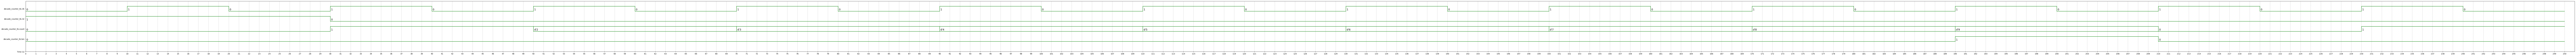

In [ ]:
%%waveform decade.vcd
sign_list = ['decade_counter_tb.clk', 'decade_counter_tb.rst', 'decade_counter_tb.count', 'decade_counter_tb.ten']
time_begin = 0
time_end = 250
base = 'dec' # bin, dec, dec2, hex, octal

6. The following figure is the test results for reference only. Your results maybe cover more test case if required.

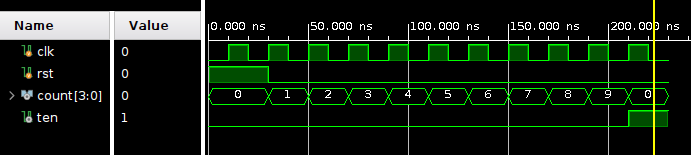

# Q2-Multiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the multiplexer as shown below using case statements.
3. The specifications of the multiplexer are:
  - The circuit is a 4-to-1 multiplexer;
  - The inputs A, B, C, D and output X are all 2-bit vectors;
  - Output X will be equal to either one of the 4 inputs depending on the 4 combinations of 2-bits signal SEL. The following True-table details the relationship between SEL and output X;

| SEL   | OUTPUT X |
|-------|----------|
| 2'b00 | A        |
| 2'b01 | B        |
| 2'b10 | C        |
| 2'b11 | D        |


4. Write a Verilog test stimulus module for the multiplexer;


In [ ]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module multiplexer(
    input [1:0]A,
    input [1:0]B,
    input [1:0]C,
    input [1:0]D,
    input [1:0]SEL,
    output reg [1:0]X
);
    always @(*) begin
        case (SEL)
            2'b00: X = A;
            2'b01: X = B;
            2'b10: X = C;
            2'b11: X = D;
            default: X = 2'bxx;
        endcase
    end

endmodule

//TESTBENCH HERE
module mux4to1_tb;
    wire [1:0] out;
    reg [1:0] i3,i2,i1,i0;
    reg [1:0] sel;

    multiplexer dut(i0, i1, i2, i3, sel, out);

    initial begin
        $dumpfile("mux4to1.vcd");
        $dumpvars(0,mux4to1_tb);

        #0 i0=2'b00; i1=2'b01; i2=2'b10; i3=2'b11;
        #2 sel=2'b00;
        #2 sel=2'b01;
        #2 sel=2'b10;
        #2 sel=2'b11;
        #2 sel=2'b00;
        #2 $finish;
    end
endmodule

VCD info: dumpfile mux4to1.vcd opened for output.



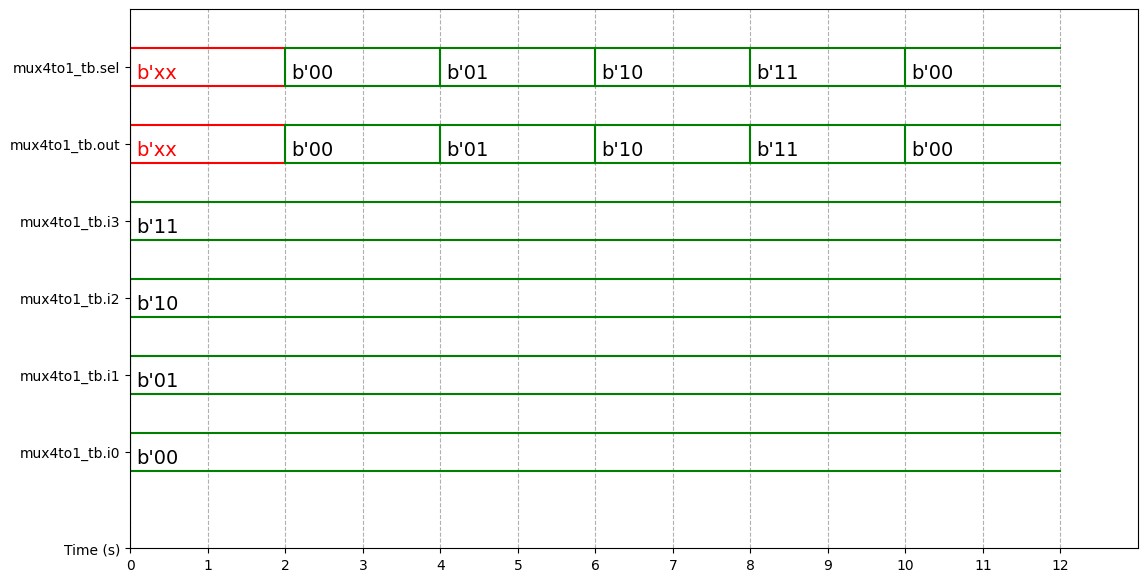

In [ ]:
%%waveform mux4to1.vcd
sign_list = ['mux4to1_tb.sel', 'mux4to1_tb.out', 'mux4to1_tb.i3', 'mux4to1_tb.i2', 'mux4to1_tb.i1', 'mux4to1_tb.i0']
time_begin = 0
time_end = 12
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the multiplexer;

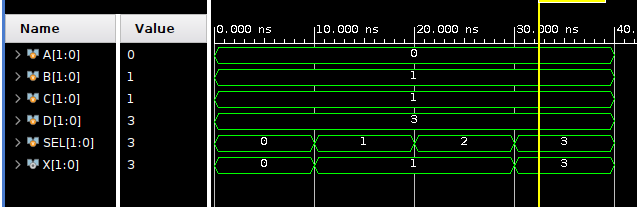

# Q3-Demultiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the demultiplexer as shown below using case statements. Saved the Verilog description as q3_xxxxxxx.v, and q3_tb_xxxxxxx.v;
3. The specifications of the demultiplexer are:
  - It is a 1-to-4 demultiplexer.
  - Input A and outputs W, X, Y, and Z are all 2-bit vectors.
  - SEL is a 2-bit select input.
  - Each of the 4 combinations of SEL will determine which of the 4 outputs will receive the value of input A.
  - When one output is equal to A, all other outputs are equal to ‘0’.

| SEL   | OUTPUT W | OUTPUT X | OUTPUT Y | OUTPUT Z |
|-------|----------|----------|----------|----------|
| 2'b00 | A        | 2'b00    | 2'b00    | 2'b00    |
| 2'b01 | 2'b00    | A        | 2'b00    | 2'b00    |
| 2'b10 | 2'b00    | 2'b00    | A        | 2'b00    |
| 2'b11 | 2'b00    | 2'b00    | 2'b00    | A        |


4. Write a Verilog test stimulus module for the demultiplexer;





In [ ]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module demultiplexer(
    input [1:0]A,
    input [1:0]SEL,
    output reg [1:0]W,
    output reg [1:0]X,
    output reg [1:0]Y,
    output reg [1:0]Z
    );

    always @(*) begin
        W = 2'b00;
        X = 2'b00;
        Y = 2'b00;
        Z = 2'b00;
        case (SEL)
            2'b00: W = A;
            2'b01: X = A;
            2'b10: Y = A;
            2'b11: Z = A;
            default begin
                W = 2'b00; X = 2'b00; Y=2'b00; Z=2'b00;
            end
        endcase
    end

endmodule

//TESTBENCH HERE
module mux1to4_tb;
    wire [1:0] w,x,y,z;
    reg [1:0] a;
    reg [1:0] sel;

    demultiplexer dut(a,sel,w,x,y,z);

    initial a=1;
    initial sel=0;
    always begin
        #1 a=a+1;
    end

    initial begin
        $dumpfile("mux1to4_tb.vcd");
        $dumpvars(0,mux1to4_tb);

        #4 sel=2'b00;
        #4 sel=2'b01;
        #4 sel=2'b10;
        #4 sel=2'b11;
        #4 sel=2'b00;
        #4 $finish;
    end
endmodule

VCD info: dumpfile mux1to4_tb.vcd opened for output.



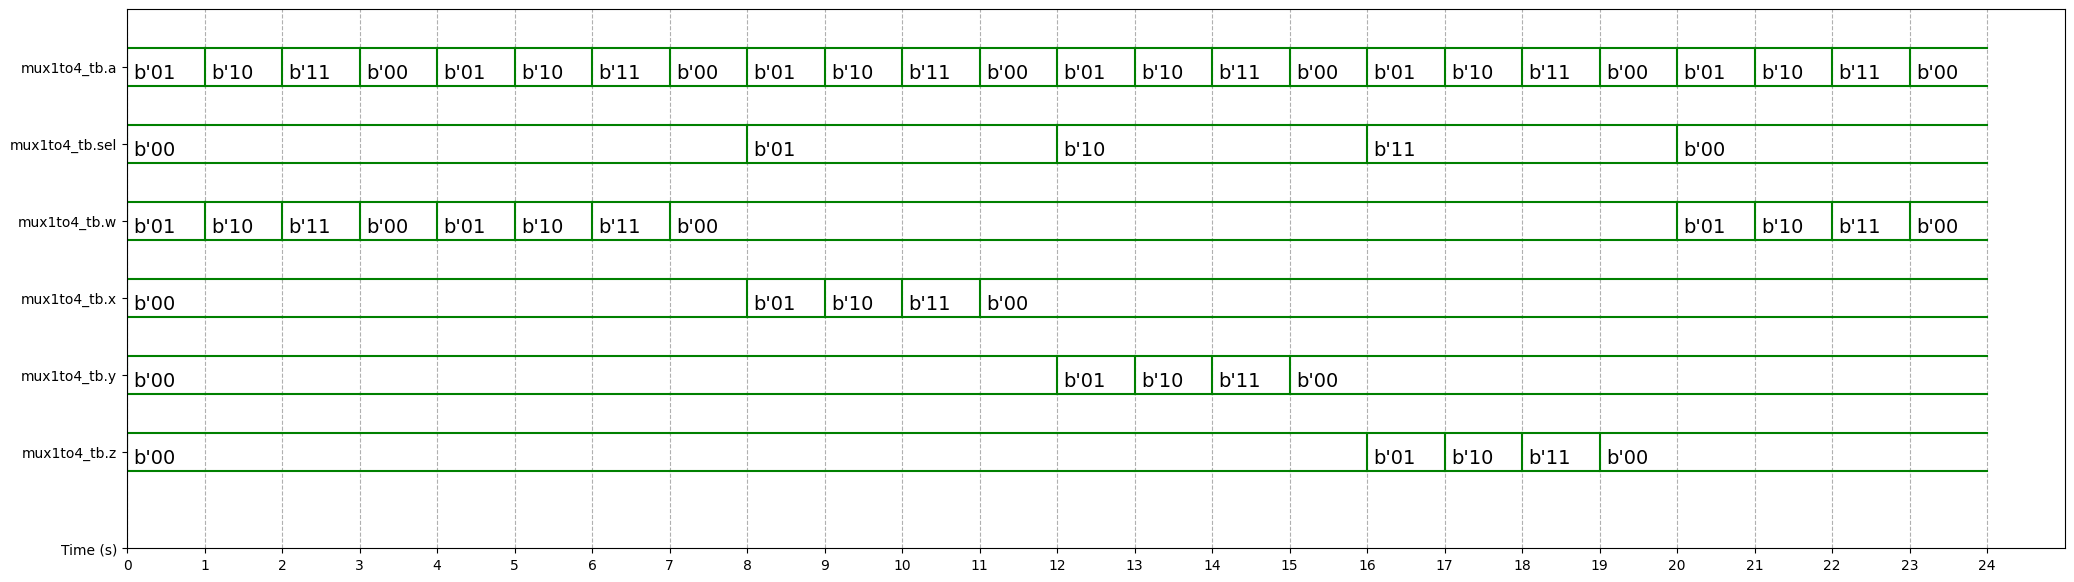

In [ ]:
%%waveform mux1to4_tb.vcd
sign_list = ['mux1to4_tb.a', 'mux1to4_tb.sel', 'mux1to4_tb.w', 'mux1to4_tb.x', 'mux1to4_tb.y', 'mux1to4_tb.z']
time_begin = 0
time_end = 24
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the demultiplexer;

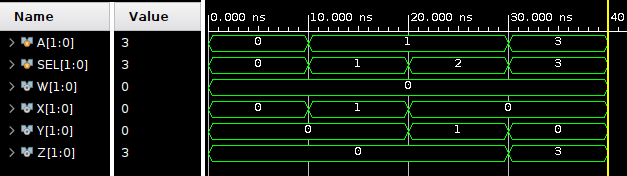

# Q4-Nibbleadd

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the nibbleadd.
3. The specifications for this module nibbleadd are:
  - Inputs A and B are both 8-bit vector inputs. Output q is 5-bit wide.
  - When ctrl input is ‘0’, output is the sum of lowest 4 bits of A and B.
  - When ctrl input is ‘1’, output is the sum of upper 4 bits of A and B.
  - Here is Verilog code template. You have to copy the template into your source file.

4. Write a Verilog test stimulus module for the nibbleadd;

In [ ]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module nibbleadd(
    input [7:0]A,
    input [7:0]B,
    input ctrl,
    output reg [4:0]q
);
    initial q=0;
    always @(*) begin
        if (ctrl == 1)
            q = A[7:4] + B[7:4];
        else
            q = A[3:0] + B[3:0];
    end

endmodule

//TESTBENCH HERE
module nibbleadd_tb;
    wire [4:0] q;
    reg [7:0] a;
    reg [7:0] b;
    reg [1:0] ctrl;

    nibbleadd dut(a,b,ctrl,q);

    // Setup initial conditions
    initial begin
        ctrl=0;
        a=0;
        b=0;
    end

    always begin
        #1 a=a+4+b;
        #1 b=b+7+a;
    end

    initial begin
        $dumpfile("nibbleadd_tb.vcd");
        $dumpvars(0,nibbleadd_tb);

        #10 ctrl=1;
        #10 $finish;
    end
endmodule

VCD info: dumpfile nibbleadd_tb.vcd opened for output.



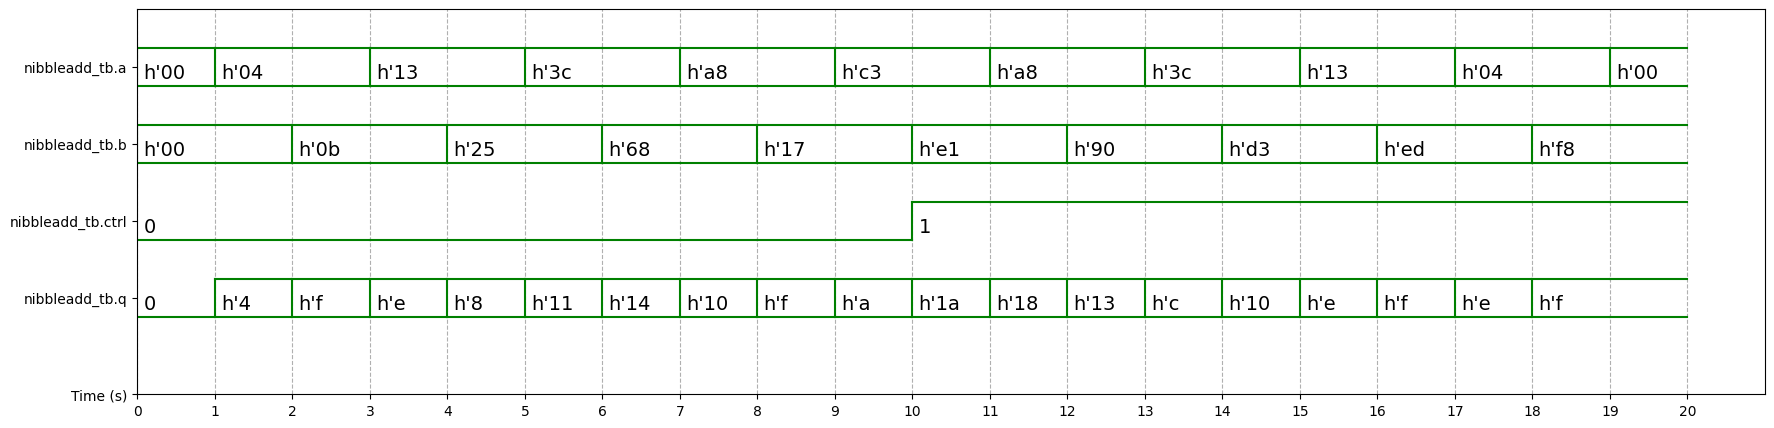

In [ ]:
%%waveform nibbleadd_tb.vcd
sign_list = ['nibbleadd_tb.a','nibbleadd_tb.b','nibbleadd_tb.ctrl','nibbleadd_tb.q']
time_begin = 0
time_end = 20
base = 'hex' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the nibbleadd;

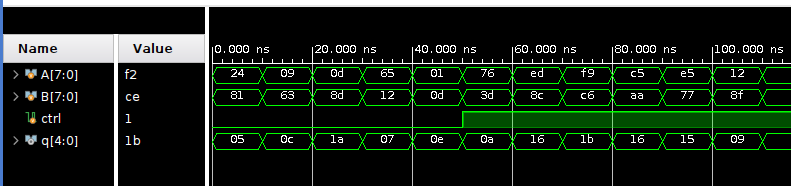

# Q5-CCTA

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the CCTA.
3. The specifications for this module CCTA are:
  - Inputs A, B and C are 4-bit vector inputs.
  - Output q is 5-bit wide.
  - rst is active high, when activated q is set to 0;
  - When ctrl input is ‘0’, output q is the sum of A and B.
  - When ctrl input is ‘1’, output q is the difference of A and C.

4. Write a Verilog test stimulus module for the CCTA;

In [ ]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module CCTA(
        input [3:0] A,
        input [3:0] B,
        input [3:0] C,
        input rst,
        input ctrl,
        output reg [4:0] q
);

    initial q=0;
    always @(*) begin
        if (rst == 0)
            q = 0;
        else if (ctrl == 0)
            q = A + B;
        else if (ctrl == 1)
            q = A - C;
        else
            q = 4'bxxxx;
    end

endmodule

//TESTBENCH
module ccta_tb;
    wire [4:0] q;
    reg [3:0] a;
    reg [3:0] b;
    reg [3:0] c;
    reg rst;
    reg ctrl;

    CCTA dut(a,b,c,rst,ctrl,q);

    // Setup initial conditions
    initial begin
        rst=0;
        ctrl=0;
        a=0; b=0; c=0;
    end

    always begin
        #1 a=a+2;
        #1 b=b+3;
        #1 c=c+5;
    end

    initial begin
        $dumpfile("ccta_tb.vcd");
        $dumpvars(0,ccta_tb);

        #2 rst=1; // Set RST to inactive
        #8 ctrl=1;
        #10 $finish;
    end
endmodule

VCD info: dumpfile ccta_tb.vcd opened for output.



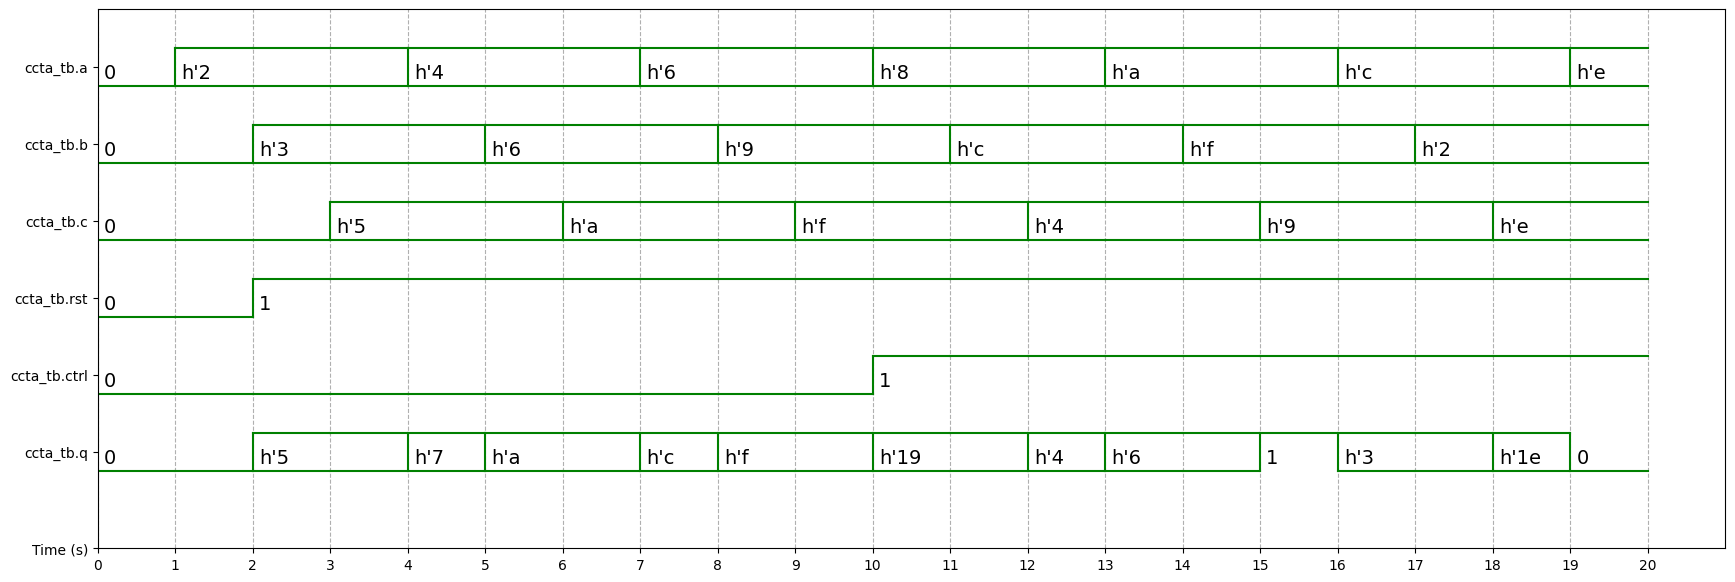

In [ ]:
%%waveform ccta_tb.vcd
sign_list = ['ccta_tb.a','ccta_tb.b','ccta_tb.c', 'ccta_tb.rst', 'ccta_tb.ctrl','ccta_tb.q']
time_begin = 0
time_end = 20
base = 'hex' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the CCTA;

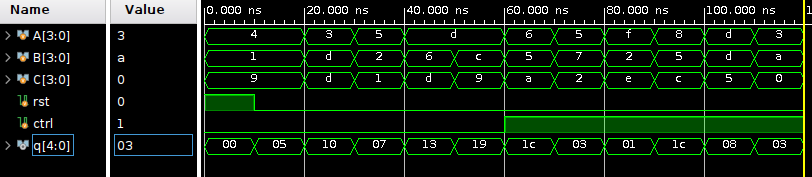